# Logistic Regression Predicting Ad Clicks
#### I'll be working with an advertising data set, indicating whether or not a particular internet user clicked on an Ad, and I'll try to create a Logistic Regression model that will predict whether or not a user will click on an ad based off the features of that user.

***datasource: https://www.kaggle.com/fayomi/advertising***

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

%matplotlib inline

## Get the Data
**Read in the advertising.csv file and create a Pandas dataframe**

In [2]:
ad_df = pd.read_csv('advertising.csv')

**I'll check out the properties of the dataframe**

In [3]:
ad_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [4]:
ad_df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [5]:
ad_df.head(10)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
5,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0
6,88.91,33,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,2016-01-28 20:59:32,0
7,66.00,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,2016-03-07 01:40:15,1
8,74.53,30,68862.00,221.51,Configurable coherent function,West Colin,1,Grenada,2016-04-18 09:33:42,0
9,69.88,20,55642.32,183.82,Mandatory homogeneous architecture,Ramirezton,1,Ghana,2016-07-11 01:42:51,0


## EDA

***I want to see the dustribution of the User Age***

***Interpreting this plot, I would say it looks like there's probably a normal distribution around 30-35 years of age***

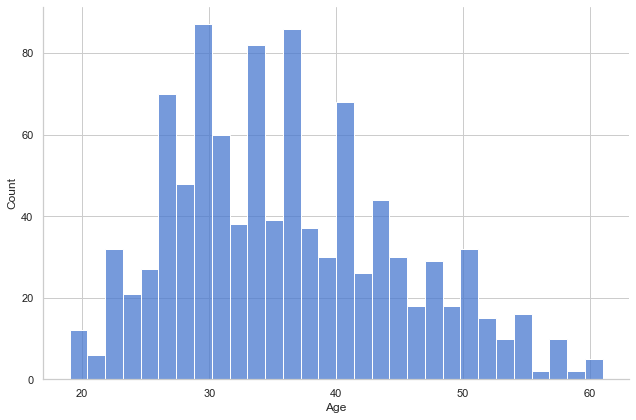

In [6]:
sns.set(style="whitegrid", palette="muted", color_codes=True)
sns.displot(ad_df['Age'],bins=30,kde=False, height=6, aspect=1.5)

**I want to look at Area Income versus Age**

***It seem like there's a steady trend of incomes increasing until around 45 which suggests that incomes start decreasing as you age from this point***

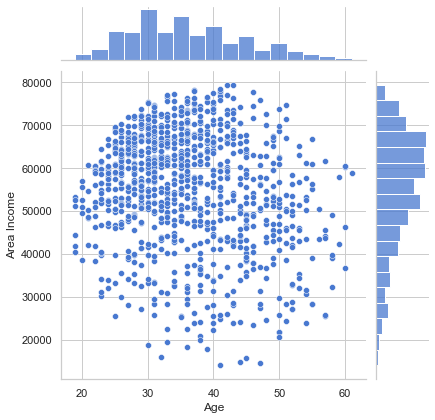

In [7]:
sns.jointplot(data=ad_df,x='Age',y='Area Income', height=6)

**I want to view the kde distributions of Daily Time spent on site vs. User Age**

**This shows those aged 20-40 tend be be the heaviest users, and as I just established in the previous plot, among the higest earners**

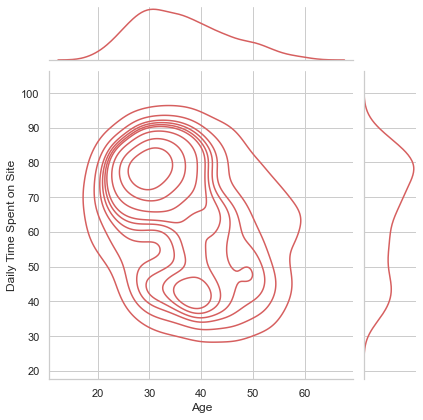

In [8]:
sns.set_palette("BuGn_r")
sns.jointplot(data=ad_df, x='Age', y='Daily Time Spent on Site', kind='kde', color='r')

***Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage***

***There are two clear clusters forming on this plot where heavy internet users tend to spend more time and vice versa for less frequent users***

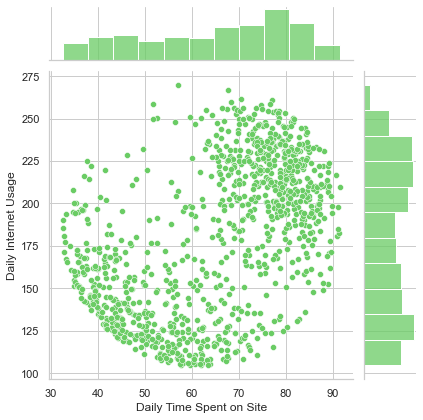

In [9]:
sns.jointplot(data=ad_df,x='Daily Time Spent on Site',y='Daily Internet Usage',kind='scatter',color='g')

**I'd like to get a better idea of what user features might have a relationship with whether or not a user Clicked on and Ad**

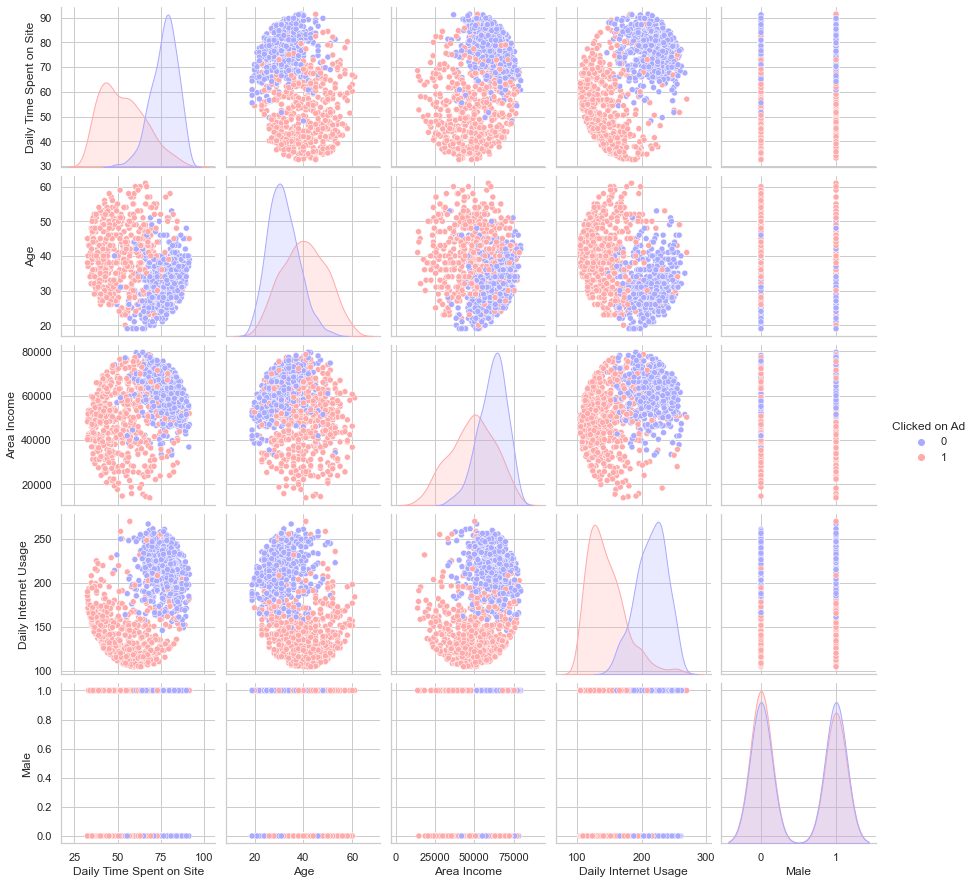

In [10]:
sns.pairplot(data=ad_df,hue='Clicked on Ad', palette='bwr')

# Logistic Regression

***Now it's time to train a model, but first I'll split the data into training set and testing set***

In [11]:
X= ad_df[['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage','Male']]
y= ad_df['Clicked on Ad']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=101)

In [12]:
logm = LogisticRegression(solver='liblinear',max_iter=100)
logm.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

## Predictions and Evaluations
***Now the model has been trained, and I'm going to use it to try and make some predictions***

In [13]:
predictions = logm.predict(X_test)

***Classification Report***

In [14]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300

[[149   8]
 [ 15 128]]


***For a basic Logistic Regression model, it does pretty well with over 90% precision and recall, and an overall accuracy of 92%***

* ***149 True Positive***
* ***128 True Negative***
* ***15 False Negative***
* ***8 False Positive***